# Stacked Machine Learning

In [1]:
## IMPORTANT !

# In the first order need to set the number of CPU 
# for calculation before launching (depends on computer's number of cores)
n_jobs= 30

### Load libraries

In [1]:
#libraries
import pandas as pd
import numpy as np
import os
import sys
import shutil
import glob
import joblib
import warnings
from datetime import date, datetime

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
import scipy.stats as st

from nilearn import image as nli
from nilearn import plotting

#from mne.viz import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

import matplotlib.patches as mpatches
import copy


### Path to the tables folder

In [2]:
#path to folder with results
path_tab_res = '/media/hcs-psy-narun/Alina_results/Alina3/raceset_outputs/bootstrap_table/'
path_tab_res_cv = '/media/hcs-psy-narun/Alina_results/Alina3/raceset_outputs/cv_table/'

In [3]:
#INDEX='cor'

In [4]:
INDEXes=['r2','cor', 'mse', 'mae']

In [5]:
dct_bootstrap={}
dct_cv={}
for INDEX in INDEXes:
    dct_bootstrap[INDEX] ={}
    dct_cv[INDEX] ={}
print(dct_bootstrap)
print(dct_cv)

{'r2': {}, 'cor': {}, 'mse': {}, 'mae': {}}
{'r2': {}, 'cor': {}, 'mse': {}, 'mae': {}}


#### load results table

In [6]:
#dct_bootstrap={}
for INDEX in INDEXes:
    for i in sorted(glob.glob(path_tab_res+'BTSTRP_'+str(INDEX)+'*')):
        dct_bootstrap[INDEX][i.split('/')[-1].split('.')[0].split('_')[-1]] = pd.read_csv(i, index_col=0)

In [7]:
#dct_cv={}
for INDEX in INDEXes:
    for i in sorted(glob.glob(path_tab_res_cv+'CV_'+str(INDEX)+'*')):
        dct_cv[INDEX][i.split('/')[-1].split('.')[0].split('_')[-1]] = pd.read_csv(i, index_col=0)

# Bootstraping

In [8]:
#confidence intervals for bootstrap
CI_dct_bootstrap= {}
for INDEX in INDEXes:
    CI_dct_bootstrap[INDEX] = {}
    
    
    for KEY in dct_bootstrap[INDEX].keys():
        
        dataset = dct_bootstrap[INDEX][KEY]

        CI1, CI2, colss = [],[], []
        for col in dataset.columns:
            CI1 += [(st.t.interval(alpha=0.95, df=len(dataset[col])-1, loc=np.mean(dataset[col]), scale=np.std(dataset[col])))[0]]
            CI2 += [(st.t.interval(alpha=0.95, df=len(dataset[col])-1, loc=np.mean(dataset[col]), scale=np.std(dataset[col])))[1]]
            colss += [col]
        df_CI = pd.DataFrame({'CI1':CI1, 'CI2':CI2}, index=colss)#.sort_values(by='CI1', ascending=True)
        CI_dct_bootstrap[INDEX][KEY]=df_CI
        
        print(INDEX.upper()+' Confidence Intervals')
        print(KEY)
        display(df_CI)

R2 Confidence Intervals
eNet+eNet


,CI1,CI2
all,0.215320,0.306247
task,0.205331,0.294342
non-task,-0.005175,0.031587
top-task,0.199024,0.288744


R2 Confidence Intervals
eNet+rf


,CI1,CI2
all,0.192265,0.275813
task,0.171218,0.258962
non-task,0.000185,0.039806
top-task,0.190802,0.271420


R2 Confidence Intervals
eNet+svr


,CI1,CI2
all,0.192746,0.296775
task,0.167396,0.276208
non-task,-0.023911,0.020501
top-task,0.182630,0.287263


R2 Confidence Intervals
eNet+xgb


,CI1,CI2
all,0.180777,0.278122
task,0.161280,0.271147
non-task,-0.054007,0.017691
top-task,0.182217,0.286000


R2 Confidence Intervals
eNet


,CI1,CI2
wm,0.148475,0.236629
lan,0.064468,0.149510
rel,0.023219,0.092764
mot,0.002547,0.044643
emo,-0.009853,0.051489
soc,0.016393,0.052613
gam,-0.007681,0.002629
rest-pca75,-0.019514,0.010713
surf,0.006538,0.043657
VolBrain,-0.006449,0.022357


R2 Confidence Intervals
flat+eNet


,CI1,CI2
all,0.209594,0.305966
task,0.201002,0.294274
non-task,-0.013930,0.043469
top-task,0.211482,0.301546


R2 Confidence Intervals
flat+rf


,CI1,CI2
all,0.138323,0.205096
task,0.132641,0.200842
non-task,0.006375,0.048252
top-task,0.146376,0.219489


R2 Confidence Intervals
flat+svr


,CI1,CI2
all,0.194137,0.309273
task,0.189063,0.301163
non-task,-0.003226,0.041652
top-task,0.197576,0.302549


R2 Confidence Intervals
flat+xgb


,CI1,CI2
all,0.138446,0.232950
task,0.161226,0.248350
non-task,-0.011555,0.039790
top-task,0.170765,0.263774


R2 Confidence Intervals
rf+eNet


,CI1,CI2
all,0.163897,0.258024
task,0.153190,0.246533
non-task,-0.009782,0.034718
top-task,0.153519,0.247565


R2 Confidence Intervals
rf+rf


,CI1,CI2
all,0.156593,0.235511
task,0.135436,0.222290
non-task,-0.002419,0.037469
top-task,0.143746,0.225057


R2 Confidence Intervals
rf+svr


,CI1,CI2
all,0.151572,0.248110
task,0.139827,0.245387
non-task,-0.026162,0.031547
top-task,0.146596,0.243896


R2 Confidence Intervals
rf+xgb


,CI1,CI2
all,0.114822,0.221670
task,0.120731,0.225778
non-task,-0.056069,0.020946
top-task,0.141088,0.243847


R2 Confidence Intervals
rf


,CI1,CI2
wm,0.101327,0.183573
lan,0.063976,0.124352
rel,0.017118,0.082600
mot,-0.002431,0.026822
emo,0.004983,0.049808
soc,0.008053,0.053305
gam,-0.014318,0.012219
rest-pca75,-0.016959,0.001127
surf,-0.002770,0.040156
VolBrain,-0.006329,0.029530


R2 Confidence Intervals
svr+eNet


,CI1,CI2
all,0.156697,0.264085
task,0.154284,0.260649
non-task,-0.019808,0.026896
top-task,0.157430,0.261105


R2 Confidence Intervals
svr+rf


,CI1,CI2
all,0.152247,0.243972
task,0.143994,0.241205
non-task,-0.018762,0.019273
top-task,0.146073,0.241879


R2 Confidence Intervals
svr+svr


,CI1,CI2
all,0.131658,0.246918
task,0.103686,0.237130
non-task,-0.048167,0.007076
top-task,0.143961,0.252243


R2 Confidence Intervals
svr+xgb


,CI1,CI2
all,0.098139,0.214181
task,0.090333,0.216626
non-task,-0.100137,-0.024441
top-task,0.101500,0.225257


R2 Confidence Intervals
svr


,CI1,CI2
wm,0.102641,0.204776
lan,0.036104,0.135246
rel,0.009452,0.091855
mot,-0.011595,0.048507
emo,-0.042801,0.029560
soc,-0.016031,0.053871
gam,-0.050499,-0.001194
rest-pca75,-0.034479,0.006677
surf,-0.006495,0.044270
VolBrain,-0.041697,0.008983


R2 Confidence Intervals
xgb+eNet


,CI1,CI2
all,0.115591,0.210581
task,0.125627,0.214745
non-task,-0.024471,0.019009
top-task,0.120077,0.216831


R2 Confidence Intervals
xgb+rf


,CI1,CI2
all,0.082825,0.177993
task,0.094121,0.181608
non-task,-0.018247,0.028333
top-task,0.102063,0.198910


R2 Confidence Intervals
xgb+svr


,CI1,CI2
all,0.087415,0.197634
task,0.084663,0.195805
non-task,-0.059216,-0.002903
top-task,0.095097,0.204495


R2 Confidence Intervals
xgb+xgb


,CI1,CI2
all,0.084104,0.183545
task,0.084528,0.185441
non-task,-0.054823,0.016476
top-task,0.105636,0.210965


R2 Confidence Intervals
xgb


,CI1,CI2
wm,0.050832,0.152381
lan,0.035700,0.121098
rel,-0.003341,0.070602
mot,-0.043032,0.010004
emo,-0.015472,0.035960
soc,0.006140,0.050437
gam,-0.029426,0.014153
rest-pca75,-0.032846,0.001789
surf,-0.033369,0.024951
VolBrain,-0.022549,0.021523


COR Confidence Intervals
eNet+eNet


,CI1,CI2
all,0.465422,0.560226
task,0.454395,0.550849
non-task,0.060458,0.184198
top-task,0.447677,0.544329


COR Confidence Intervals
eNet+rf


,CI1,CI2
all,0.439969,0.537318
task,0.415412,0.517850
non-task,0.082476,0.208953
top-task,0.439115,0.536458


COR Confidence Intervals
eNet+svr


,CI1,CI2
all,0.450375,0.546872
task,0.426166,0.527222
non-task,0.042127,0.170053
top-task,0.439003,0.539040


COR Confidence Intervals
eNet+xgb


,CI1,CI2
all,0.432412,0.528980
task,0.418608,0.521850
non-task,0.035851,0.167518
top-task,0.436055,0.536111


COR Confidence Intervals
eNet


,CI1,CI2
wm,0.388011,0.493332
lan,0.266405,0.391652
rel,0.181705,0.308234
mot,0.096945,0.218824
emo,0.100694,0.228979
soc,0.135036,0.250317
gam,-0.078619,0.060280
rest-pca75,-0.025000,0.106934
surf,0.100709,0.225083
VolBrain,0.037615,0.157650


COR Confidence Intervals
flat+eNet


,CI1,CI2
all,0.459335,0.560319
task,0.449366,0.553464
non-task,0.091228,0.210804
top-task,0.461235,0.556235


COR Confidence Intervals
flat+rf


,CI1,CI2
all,0.381431,0.490110
task,0.371556,0.480437
non-task,0.108339,0.230245
top-task,0.387331,0.493419


COR Confidence Intervals
flat+svr


,CI1,CI2
all,0.457195,0.557776
task,0.448715,0.550994
non-task,0.085127,0.208307
top-task,0.457556,0.553566


COR Confidence Intervals
flat+xgb


,CI1,CI2
all,0.377155,0.487409
task,0.403057,0.510308
non-task,0.076584,0.201773
top-task,0.415175,0.521699


COR Confidence Intervals
rf+eNet


,CI1,CI2
all,0.408451,0.513051
task,0.395741,0.501311
non-task,0.062528,0.189556
top-task,0.396245,0.502449


COR Confidence Intervals
rf+rf


,CI1,CI2
all,0.397397,0.500913
task,0.371614,0.478348
non-task,0.077627,0.200065
top-task,0.380674,0.486365


COR Confidence Intervals
rf+svr


,CI1,CI2
all,0.400893,0.505400
task,0.391978,0.500236
non-task,0.064820,0.195064
top-task,0.393812,0.499572


COR Confidence Intervals
rf+xgb


,CI1,CI2
all,0.364928,0.471886
task,0.369097,0.476493
non-task,0.062049,0.185239
top-task,0.391079,0.495213


COR Confidence Intervals
rf


,CI1,CI2
wm,0.323055,0.437161
lan,0.256840,0.378771
rel,0.164858,0.291882
mot,0.051970,0.180620
emo,0.106104,0.232242
soc,0.117089,0.240613
gam,-0.017897,0.115331
rest-pca75,-0.058761,0.048348
surf,0.082462,0.205697
VolBrain,0.050634,0.179662


COR Confidence Intervals
svr+eNet


,CI1,CI2
all,0.411954,0.514760
task,0.405305,0.511643
non-task,0.038691,0.166639
top-task,0.405616,0.513036


COR Confidence Intervals
svr+rf


,CI1,CI2
all,0.394014,0.498806
task,0.386647,0.493929
non-task,0.019384,0.142266
top-task,0.388301,0.495411


COR Confidence Intervals
svr+svr


,CI1,CI2
all,0.394287,0.500568
task,0.382610,0.496958
non-task,-0.010698,0.120576
top-task,0.401015,0.507987


COR Confidence Intervals
svr+xgb


,CI1,CI2
all,0.355983,0.466662
task,0.362121,0.473671
non-task,-0.031109,0.092527
top-task,0.363445,0.477985


COR Confidence Intervals
svr


,CI1,CI2
wm,0.350071,0.458884
lan,0.252284,0.376524
rel,0.186827,0.309017
mot,0.104214,0.226282
emo,0.068420,0.196317
soc,0.115345,0.239719
gam,-0.038436,0.093246
rest-pca75,-0.021737,0.116881
surf,0.100658,0.224387
VolBrain,0.000068,0.126566


COR Confidence Intervals
xgb+eNet


,CI1,CI2
all,0.351725,0.461023
task,0.360525,0.468064
non-task,0.022757,0.144158
top-task,0.357912,0.468032


COR Confidence Intervals
xgb+rf


,CI1,CI2
all,0.308276,0.423344
task,0.314907,0.432059
non-task,0.049604,0.171132
top-task,0.332195,0.449309


COR Confidence Intervals
xgb+svr


,CI1,CI2
all,0.337009,0.451017
task,0.336167,0.450337
non-task,-0.015337,0.107218
top-task,0.341947,0.457541


COR Confidence Intervals
xgb+xgb


,CI1,CI2
all,0.320396,0.430571
task,0.321101,0.432687
non-task,0.054742,0.171077
top-task,0.348463,0.461209


COR Confidence Intervals
xgb


,CI1,CI2
wm,0.276287,0.393173
lan,0.223992,0.349396
rel,0.141701,0.267909
mot,-0.006552,0.124897
emo,0.074233,0.193025
soc,0.109981,0.233729
gam,0.002994,0.128566
rest-pca75,-0.052723,0.074575
surf,0.040916,0.168539
VolBrain,0.024408,0.150933


MSE Confidence Intervals
eNet+eNet


,CI1,CI2
all,110.279701,133.047164
task,111.702720,135.246907
non-task,147.979156,176.953821
top-task,112.814924,136.082784


MSE Confidence Intervals
eNet+rf


,CI1,CI2
all,114.595342,137.546133
task,116.882138,141.519449
non-task,146.971459,175.722590
top-task,114.694684,138.435029


MSE Confidence Intervals
eNet+svr


,CI1,CI2
all,112.747304,135.818467
task,115.785240,140.351343
non-task,149.653834,180.209917
top-task,113.997167,137.811385


MSE Confidence Intervals
eNet+xgb


,CI1,CI2
all,115.109556,138.516829
task,116.453569,141.529859
non-task,153.046756,182.156903
top-task,113.951333,138.144672


MSE Confidence Intervals
eNet


,CI1,CI2
wm,120.190533,145.637936
lan,133.083710,160.933796
rel,140.692982,169.478603
mot,146.121211,175.400279
emo,145.953972,176.488784
soc,144.255119,173.690581
gam,149.963048,180.182445
rest-pca75,150.227537,180.526934
surf,146.198155,174.818289
VolBrain,148.696461,177.975073


MSE Confidence Intervals
flat+eNet


,CI1,CI2
all,110.636064,133.670052
task,112.002065,135.662253
non-task,147.959624,176.426645
top-task,110.808959,133.932499


MSE Confidence Intervals
flat+rf


,CI1,CI2
all,123.747642,148.969180
task,124.394517,149.961025
non-task,146.014148,174.261257
top-task,121.893744,147.123160


MSE Confidence Intervals
flat+svr


,CI1,CI2
all,111.367998,134.890889
task,112.165612,136.285881
non-task,147.225496,175.714800
top-task,111.513413,135.324338


MSE Confidence Intervals
flat+xgb


,CI1,CI2
all,121.376524,146.686170
task,118.522638,143.269126
non-task,147.794616,176.826066
top-task,116.571024,141.098223


MSE Confidence Intervals
rf+eNet


,CI1,CI2
all,117.687732,142.048567
task,119.208593,144.193455
non-task,147.952299,177.223055
top-task,119.045036,144.134134


MSE Confidence Intervals
rf+rf


,CI1,CI2
all,120.252703,144.414691
task,122.428081,147.903513
non-task,147.250683,176.261054
top-task,121.798473,146.710957


MSE Confidence Intervals
rf+svr


,CI1,CI2
all,119.360622,144.032385
task,120.108670,145.659846
non-task,149.073140,179.323197
top-task,119.719642,145.201742


MSE Confidence Intervals
rf+xgb


,CI1,CI2
all,124.440909,149.316226
task,123.311457,148.819176
non-task,152.871514,182.131409
top-task,120.353375,145.457225


MSE Confidence Intervals
rf


,CI1,CI2
wm,127.742467,154.601506
lan,135.329419,162.939967
rel,142.047892,170.802139
mot,147.945011,177.335122
emo,145.363696,174.912843
soc,145.103660,174.079642
gam,149.789023,179.861210
rest-pca75,150.900620,181.010901
surf,147.204036,175.914116
VolBrain,148.268333,177.191674


MSE Confidence Intervals
svr+eNet


,CI1,CI2
all,117.586641,142.309275
task,117.727085,143.150898
non-task,149.282042,178.830690
top-task,117.426932,142.866773


MSE Confidence Intervals
svr+rf


,CI1,CI2
all,119.433068,144.551873
task,119.954066,145.847774
non-task,149.873511,179.325382
top-task,119.820009,145.528430


MSE Confidence Intervals
svr+svr


,CI1,CI2
all,120.444285,146.397091
task,122.386390,150.663891
non-task,152.458842,183.598573
top-task,118.776963,145.199228


MSE Confidence Intervals
svr+xgb


,CI1,CI2
all,125.605943,152.138911
task,125.555484,153.064264
non-task,159.310264,190.438059
top-task,123.881864,151.494199


MSE Confidence Intervals
svr


,CI1,CI2
wm,125.679124,152.927901
lan,135.760896,165.272235
rel,141.833858,170.729998
mot,146.844171,176.351350
emo,150.223746,181.231551
soc,146.738186,176.292222
gam,153.336429,184.469765
rest-pca75,151.457077,182.426921
surf,146.555492,176.520335
VolBrain,152.146593,182.521416


MSE Confidence Intervals
xgb+eNet


,CI1,CI2
all,124.891189,150.613406
task,123.843868,149.335275
non-task,150.318149,179.859390
top-task,123.906694,149.834038


MSE Confidence Intervals
xgb+rf


,CI1,CI2
all,129.488041,156.796048
task,128.204188,155.650466
non-task,149.221832,178.389347
top-task,126.416506,153.252509


MSE Confidence Intervals
xgb+svr


,CI1,CI2
all,127.728838,154.521863
task,127.976868,155.030867
non-task,154.135123,185.378764
top-task,126.330100,153.542872


MSE Confidence Intervals
xgb+xgb


,CI1,CI2
all,129.130375,156.010360
task,128.821990,155.939603
non-task,152.926774,182.624830
top-task,125.242191,151.830613


MSE Confidence Intervals
xgb


,CI1,CI2
wm,133.779188,161.979234
lan,137.500191,165.927489
rel,144.530706,173.648045
mot,152.219862,182.494768
emo,148.016606,177.897315
soc,145.368089,174.607981
gam,150.741812,181.066378
rest-pca75,151.993264,182.417736
surf,150.600057,180.044921
VolBrain,150.105658,179.335391


MAE Confidence Intervals
eNet+eNet


,CI1,CI2
all,8.500528,9.376526
task,8.516263,9.408376
non-task,9.795317,10.806461
top-task,8.553515,9.444890


MAE Confidence Intervals
eNet+rf


,CI1,CI2
all,8.649932,9.545145
task,8.663306,9.589176
non-task,9.760918,10.768667
top-task,8.611597,9.517270


MAE Confidence Intervals
eNet+svr


,CI1,CI2
all,8.545629,9.436527
task,8.691506,9.596910
non-task,9.784043,10.814181
top-task,8.627749,9.524616


MAE Confidence Intervals
eNet+xgb


,CI1,CI2
all,8.639164,9.544557
task,8.540338,9.478278
non-task,10.023286,11.033534
top-task,8.505204,9.424317


MAE Confidence Intervals
eNet


,CI1,CI2
wm,8.731696,9.675527
lan,9.276927,10.250030
rel,9.472768,10.483400
mot,9.726085,10.741553
emo,9.715582,10.735162
soc,9.633545,10.642742
gam,9.845269,10.872888
rest-pca75,9.857578,10.882223
surf,9.753676,10.755666
VolBrain,9.835475,10.848106


MAE Confidence Intervals
flat+eNet


,CI1,CI2
all,8.562889,9.430987
task,8.589306,9.473309
non-task,9.790761,10.794530
top-task,8.525104,9.402173


MAE Confidence Intervals
flat+rf


,CI1,CI2
all,8.959688,9.893675
task,8.970323,9.911147
non-task,9.737403,10.734766
top-task,8.900718,9.828236


MAE Confidence Intervals
flat+svr


,CI1,CI2
all,8.530535,9.403122
task,8.521327,9.410931
non-task,9.787870,10.789722
top-task,8.452788,9.344972


MAE Confidence Intervals
flat+xgb


,CI1,CI2
all,8.850100,9.770913
task,8.726614,9.649407
non-task,9.796804,10.800592
top-task,8.660883,9.575994


MAE Confidence Intervals
rf+eNet


,CI1,CI2
all,8.745469,9.656901
task,8.783781,9.709913
non-task,9.795102,10.804210
top-task,8.765442,9.691994


MAE Confidence Intervals
rf+rf


,CI1,CI2
all,8.816667,9.735709
task,8.872430,9.810543
non-task,9.761763,10.770710
top-task,8.836188,9.772484


MAE Confidence Intervals
rf+svr


,CI1,CI2
all,8.777759,9.699532
task,8.749134,9.690316
non-task,9.791355,10.812013
top-task,8.768029,9.703658


MAE Confidence Intervals
rf+xgb


,CI1,CI2
all,9.009456,9.934412
task,8.891032,9.833471
non-task,9.914314,10.940193
top-task,8.776115,9.711189


MAE Confidence Intervals
rf


,CI1,CI2
wm,9.047235,10.015757
lan,9.342636,10.318628
rel,9.570509,10.577618
mot,9.813625,10.827375
emo,9.673288,10.691779
soc,9.636809,10.648680
gam,9.837045,10.865150
rest-pca75,9.902178,10.924385
surf,9.758258,10.762985
VolBrain,9.832569,10.838533


MAE Confidence Intervals
svr+eNet


,CI1,CI2
all,8.751889,9.657357
task,8.716377,9.636174
non-task,9.822744,10.840859
top-task,8.666368,9.590386


MAE Confidence Intervals
svr+rf


,CI1,CI2
all,8.790413,9.709009
task,8.771368,9.707507
non-task,9.863194,10.878022
top-task,8.725253,9.664353


MAE Confidence Intervals
svr+svr


,CI1,CI2
all,8.751564,9.689240
task,8.827893,9.783401
non-task,9.904908,10.942108
top-task,8.656063,9.598618


MAE Confidence Intervals
svr+xgb


,CI1,CI2
all,8.966014,9.912882
task,8.899547,9.861683
non-task,10.106863,11.155786
top-task,8.787362,9.755260


MAE Confidence Intervals
svr


,CI1,CI2
wm,8.884293,9.858418
lan,9.286573,10.286168
rel,9.493788,10.506370
mot,9.743059,10.754844
emo,9.746271,10.796912
soc,9.685325,10.705172
gam,9.903354,10.948910
rest-pca75,9.882467,10.914291
surf,9.683891,10.703830
VolBrain,9.919194,10.943908


MAE Confidence Intervals
xgb+eNet


,CI1,CI2
all,9.013360,9.950976
task,8.946687,9.887623
non-task,9.892788,10.908760
top-task,8.910500,9.860662


MAE Confidence Intervals
xgb+rf


,CI1,CI2
all,9.038723,10.022077
task,8.991260,9.973325
non-task,9.873554,10.880993
top-task,8.918488,9.891892


MAE Confidence Intervals
xgb+svr


,CI1,CI2
all,9.062169,10.020227
task,9.050912,10.018297
non-task,9.994165,11.029129
top-task,8.907736,9.887598


MAE Confidence Intervals
xgb+xgb


,CI1,CI2
all,9.070576,10.035383
task,9.031440,10.007230
non-task,9.965455,10.989977
top-task,8.889948,9.854267


MAE Confidence Intervals
xgb


,CI1,CI2
wm,9.178674,10.180412
lan,9.311601,10.308239
rel,9.650279,10.664683
mot,9.952905,10.978413
emo,9.769186,10.793408
soc,9.646241,10.656385
gam,9.840243,10.875863
rest-pca75,9.913169,10.939898
surf,9.884649,10.898293
VolBrain,9.910436,10.917721


## Bootstrap plot

##### reorganize tables for plotting

In [9]:
#stack into one table for plot

dct_plot_tab = {}

for INDEX in INDEXes:
    
    dct_plot_tab[INDEX] = {}
    
    for model in dct_bootstrap[INDEX]['eNet+eNet'].columns:

        #combine into one table by type of model
        v1 = []
        v2 = []
        dfdf = pd.DataFrame()
        for key in dct_bootstrap[INDEX].keys():
            if len(key.split('+')) >=2:
                v1 += [key.split('+')[0]]
                v2 += [key.split('+')[1]]
                dfdf[key] = dct_bootstrap[INDEX][key][model]                 

        #change names to upper case        
        V1=[]
        for i in v1:
            if i in ['svr', 'rf', 'xgb']:
                V1 += [i.upper()]
            else: 
                V1 += [i]    
        V2=[]
        for i in v2:

            if i in ['svr', 'rf', 'xgb']:
                V2 += [i.upper()]
            else: 
                V2 += [i]    

        #multi-index        
        collumnss = pd.MultiIndex.from_tuples(list(zip( V1,V2)), names=["single", "stack"])
        dfdf.columns=collumnss


        #reorganize table into long one for easy plotting

        dct_t2 = {}
        for col in dfdf.columns:
            nums = dfdf[col].values
            inds1 = np.full(len(dfdf[col].values), col[0])
            inds2 = np.full(len(dfdf[col].values), col[1])
            dct_t2[('_'.join(col))] = pd.DataFrame({'$R^2$': nums, 'Single Modality \nAlgorithm':inds1, 
                                                    'Stacking Algorithm':inds2})

        #table for plot
        dfdf2 = dct_t2[sorted(dct_t2.keys())[0]]
        for key in sorted(dct_t2.keys())[1:]:
            dfdf2 = pd.concat([dfdf2, dct_t2[key]], axis=0, ignore_index=True)
        #display(dfdf2)

        dct_plot_tab[INDEX][model]=dfdf2

##### Bootstrap plot

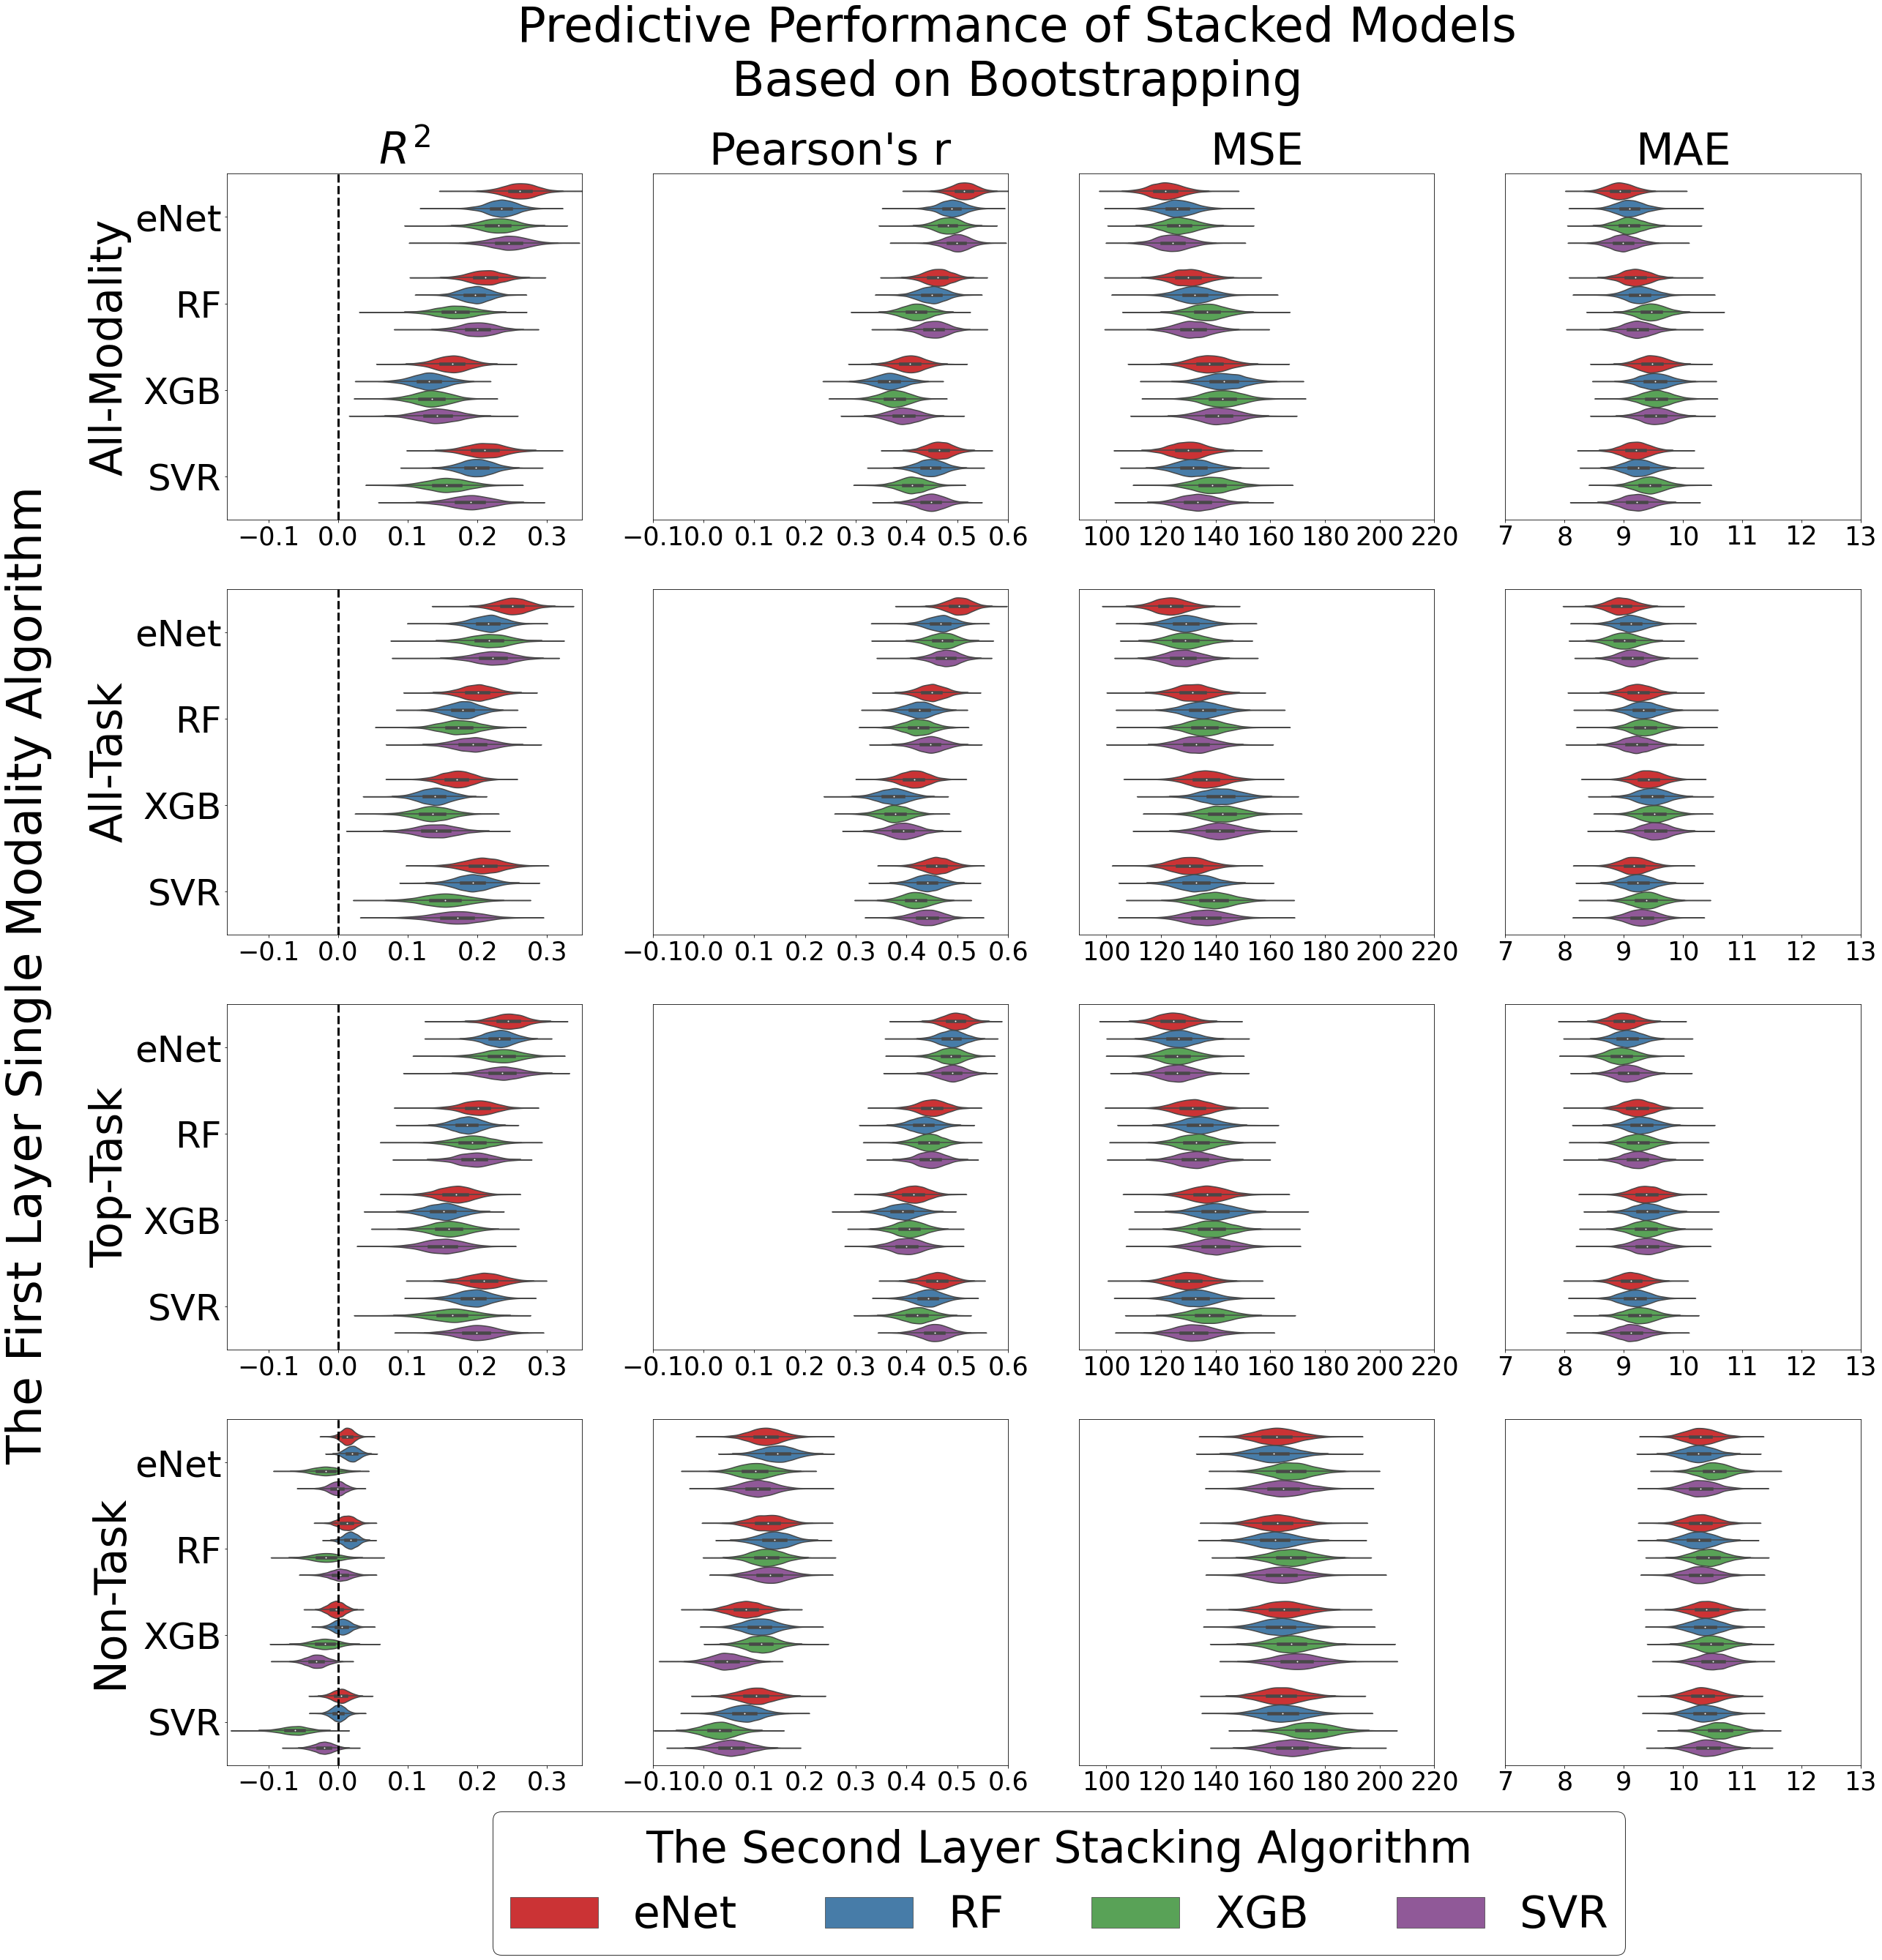

In [16]:
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle(" Predictive Performance of Stacked Models \nBased on Bootstrapping", fontsize=65, y=0.96)



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1
    
    for modtype, y in zip(['all', 'task','top-task', 'non-task'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.16, 0.35)
            if INDEX in ['cor']:
                lim = (-0.1,0.6)
            if INDEX in ['mse']:
                lim = (90,220)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  

            sns.violinplot(x='$R^2$', y='Single Modality \nAlgorithm', hue='Stacking Algorithm', 
                           data = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']!='flat'], 
                           palette=palette,
                           order=['eNet', 'RF', 'XGB','SVR'],
                           hue_order=['eNet', 'RF', 'XGB','SVR'])
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='all':
                    plt.ylabel('All-Modality',fontsize=60)
                if modtype=='task':
                    plt.ylabel('All-Task',fontsize=60)
                if modtype=='top-task':
                    plt.ylabel('Top-Task',fontsize=60)
                if modtype=='non-task':
                    plt.ylabel('Non-Task',fontsize=60)
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)

            if k+y==16:
                plt.legend(loc='upper right', fontsize=60, bbox_to_anchor=(0.4, -0.07), 
                       title="The Second Layer Stacking Algorithm", title_fontsize=60, ncol=4, edgecolor='black')
            else:
                plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()

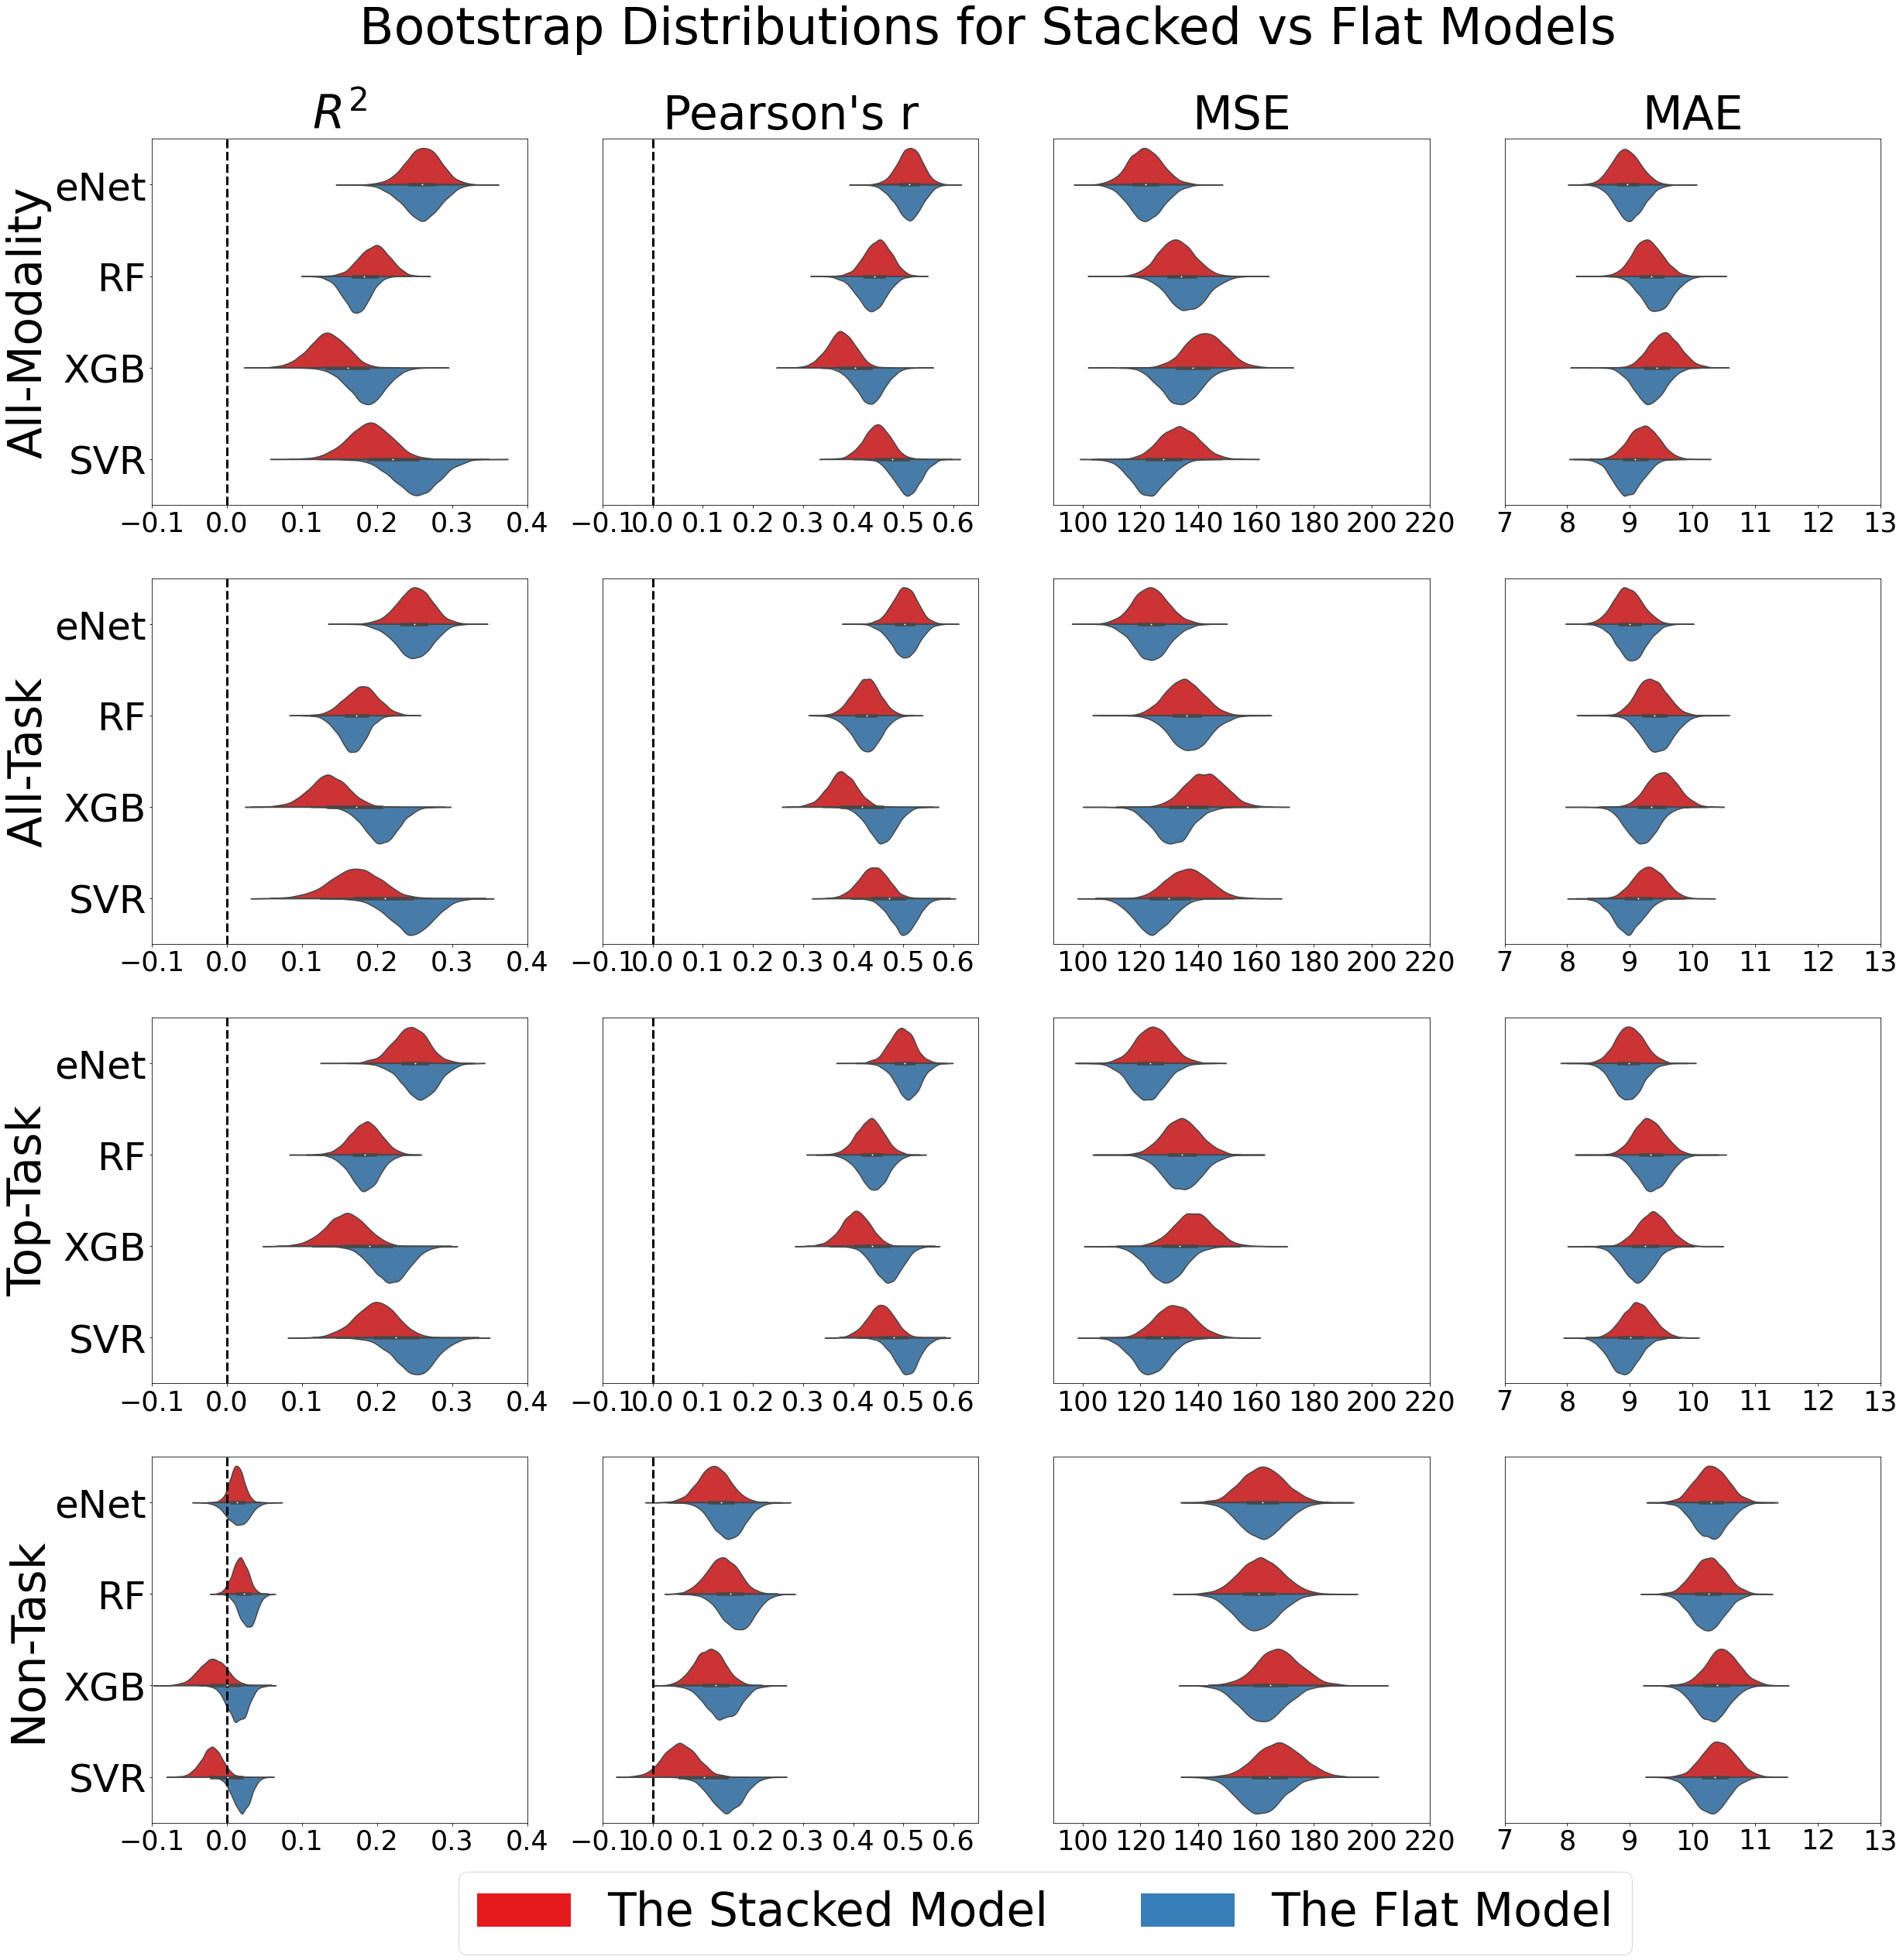

In [20]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle('Bootstrap Distributions for Stacked vs Flat Models', fontsize=65, y=0.94)



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1
    
    for modtype, y in zip(['all', 'task','top-task', 'non-task'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.1, 0.4)
            if INDEX in ['cor']:
                lim = (-0.1,0.65)
            if INDEX in ['mse']:
                lim = (90,220)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  

            data1 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='flat']
            data2 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='RF'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='RF']
            data3 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='SVR'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='SVR']
            data4 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='XGB'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='XGB']
            data5 = dct_plot_tab[INDEX][modtype][dct_plot_tab[INDEX][modtype]['Single Modality \nAlgorithm']=='eNet'][dct_plot_tab[INDEX][modtype]['Stacking Algorithm']=='eNet']

            Data = pd.concat([data2, data3, data4, data5, data1], axis=0, ignore_index=True)
            Data = Data.sort_values(by=['Stacking Algorithm','Single Modality \nAlgorithm'])

            for i in Data['Single Modality \nAlgorithm'].index:
                if Data.loc[i, 'Single Modality \nAlgorithm'] != 'flat':
                    Data.loc[i, 'Single Modality \nAlgorithm'] = 'one'

            sns.violinplot(x='$R^2$', y='Stacking Algorithm', hue='Single Modality \nAlgorithm', 
                           data = Data, 
                           palette=palette, split=True,
                          order=['eNet', 'RF', 'XGB','SVR'])
            
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='all':
                    plt.ylabel('All-Modality',fontsize=60)
                if modtype=='task':
                    plt.ylabel('All-Task',fontsize=60)
                if modtype=='top-task':
                    plt.ylabel('Top-Task',fontsize=60)
                if modtype=='non-task':
                    plt.ylabel('Non-Task',fontsize=60)
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)
                
            if k+y in [2,6,10,14]:
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)

            if k+y==16:
                plt.legend(handles=[mpatches.Patch(color=sns.color_palette("Set1")[0], label='The Stacked Model'),
                                    mpatches.Patch(color=sns.color_palette("Set1")[1], label='The Flat Model')],
                           bbox_to_anchor=(0.4, -0.07), fontsize=60, ncol=2)
            else:
                plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
#fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()

# CV

##### reorganize tables for plotting

In [12]:
#stack into one table for plot
dct_cv_plot_stacked = {}

for INDEX in INDEXes:
    
    dct_cv_plot_stacked[INDEX] = {}
    
    for model in dct_cv[INDEX]['eNet+eNet'].columns:
        
        #combine into one table by type of model
        v1 = []
        v2 = []
        dfdf = pd.DataFrame()
        for key in dct_cv[INDEX].keys():
            if model in dct_cv[INDEX]['eNet+eNet'].columns[1:] and 'flat' not in key:
                if len(key.split('+')) >=2:
                    v1 += [key.split('+')[0]]
                    v2 += [key.split('+')[1]]
                    dfdf[key] = dct_cv[INDEX][key][model]
            if dct_cv[INDEX]['eNet+eNet'].columns[0] in model:
                if len(key.split('+')) >=2:
                    v1 += [key.split('+')[0]]
                    v2 += [key.split('+')[1]]
                    dfdf[key] = dct_cv[INDEX][key][model]            

        V1=[]
        for i in v1:
            if i in ['svr', 'rf', 'xgb']:
                V1 += [i.upper()]
            else: 
                V1 += [i]    
        V2=[]
        for i in v2:
            if i in ['svr', 'rf', 'xgb']:
                V2 += [i.upper()]
            else: 
                V2 += [i]    

        #multi-index        
        collumnss = pd.MultiIndex.from_tuples(list(zip( V1,V2)), names=["single", "stack"])
        dfdf.columns=collumnss


        #reorganize table into long one for easy plotting

        dct_t2 = {}
        for col in dfdf.columns:
            nums = dfdf[col].values
            inds1 = np.full(len(dfdf[col].values), col[0])
            inds2 = np.full(len(dfdf[col].values), col[1])
            dct_t2[('_'.join(col))] = pd.DataFrame({'$R^2$': nums, 'Single Modality \nAlgorithm':inds1, 
                                                    'Stacking Algorithm':inds2})

        #table for plot
        dfdf2 = dct_t2[sorted(dct_t2.keys())[0]]
        for key in sorted(dct_t2.keys())[1:]:
            dfdf2 = pd.concat([dfdf2, dct_t2[key]], axis=0, ignore_index=True)
        #display(dfdf2)

        dct_cv_plot_stacked[INDEX][model]=dfdf2

## CV plotting

###### CV stacked models

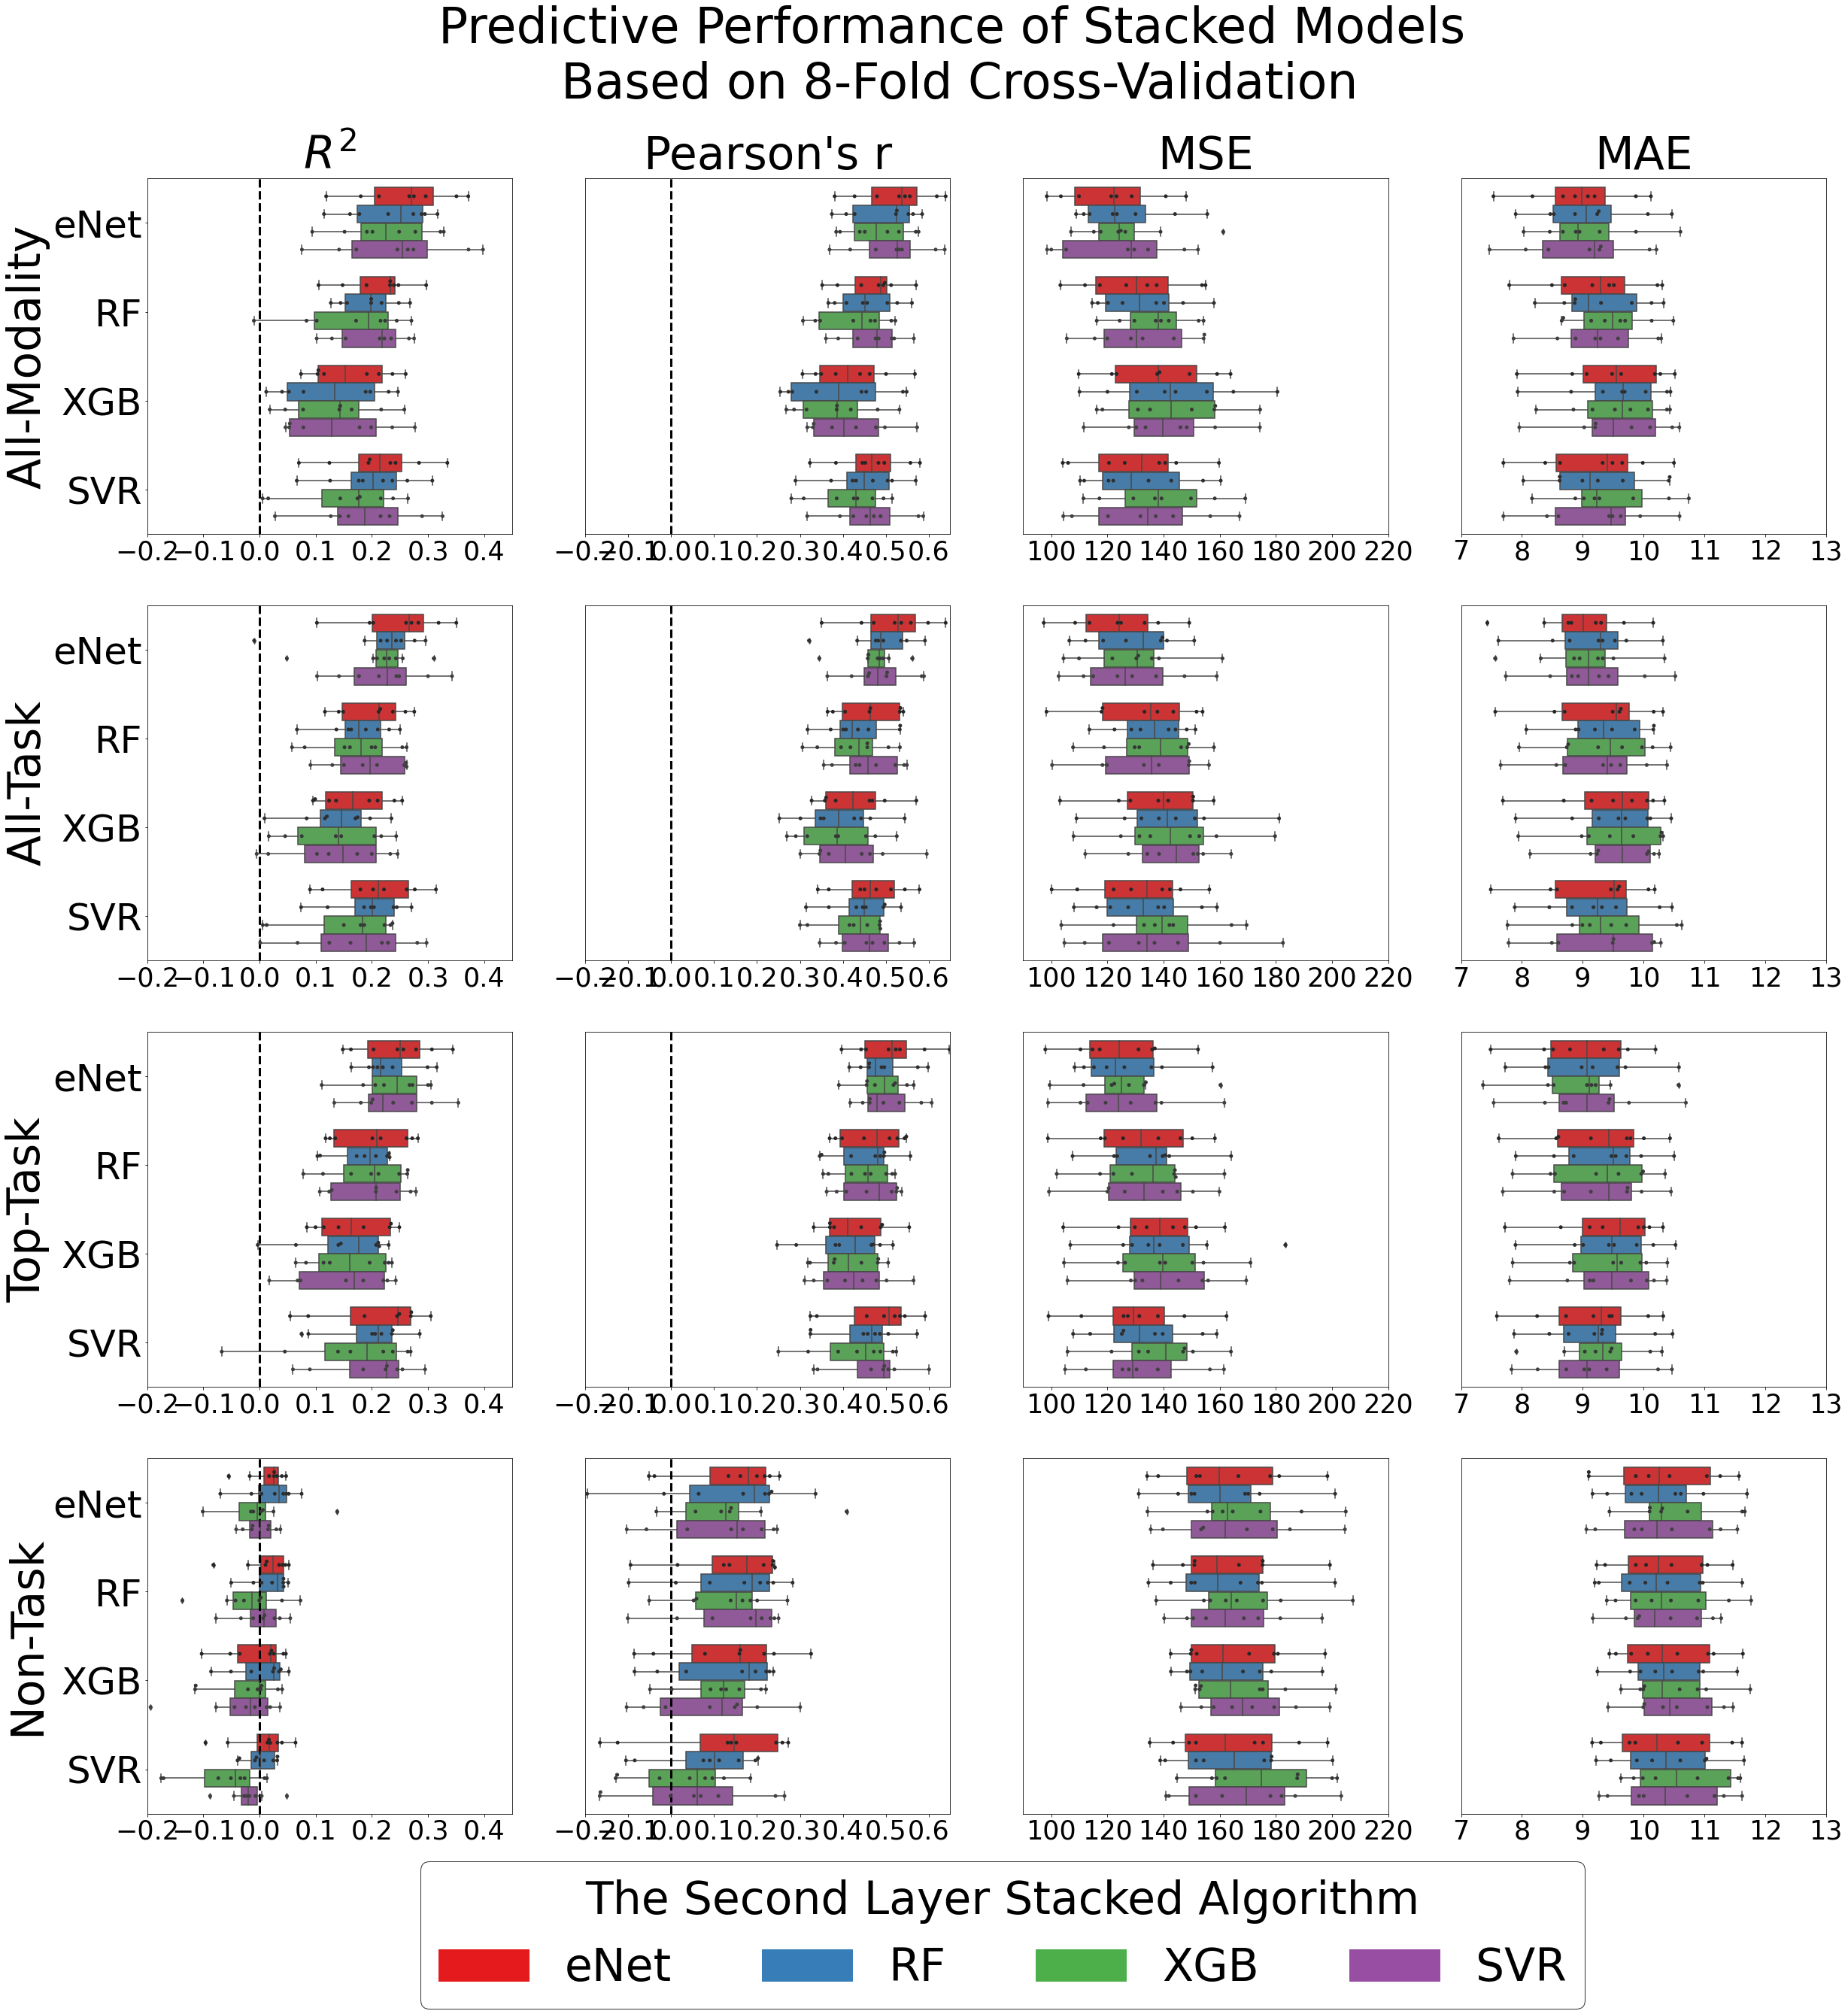

In [25]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle('Predictive Performance of Stacked Models \nBased on 8-Fold Cross-Validation', fontsize=65, y=0.96)



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1
    
    for modtype, y in zip(['all', 'task','top-task', 'non-task'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.2, 0.45)
            if INDEX in ['cor']:
                lim = (-0.2,0.65)
            if INDEX in ['mse']:
                lim = (90,220)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  

            sns.boxplot(x='$R^2$', y='Single Modality \nAlgorithm', 
                        hue='Stacking Algorithm', 
                        data = dct_cv_plot_stacked[INDEX][modtype][dct_cv_plot_stacked[INDEX][modtype]['Single Modality \nAlgorithm']!='flat'],
                        orient="h", palette=palette,
                        order=['eNet', 'RF', 'XGB','SVR'], hue_order=['eNet', 'RF', 'XGB','SVR'])
            sns.swarmplot(x='$R^2$', y='Single Modality \nAlgorithm', 
                          hue='Stacking Algorithm', 
                          data = dct_cv_plot_stacked[INDEX][modtype][dct_cv_plot_stacked[INDEX][modtype]['Single Modality \nAlgorithm']!='flat'],   
                          color=".25", orient="h", dodge=True,
                          order=['eNet', 'RF', 'XGB','SVR'], hue_order=['eNet', 'RF', 'XGB','SVR'])
            
            
            
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='all':
                    plt.ylabel('All-Modality',fontsize=60)
                if modtype=='task':
                    plt.ylabel('All-Task',fontsize=60)
                if modtype=='top-task':
                    plt.ylabel('Top-Task',fontsize=60)
                if modtype=='non-task':
                    plt.ylabel('Non-Task',fontsize=60)
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)
                
            if k+y in [2,6,10,14]:
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)

            if k+y==16:
                plt.legend(handles=[mpatches.Patch(color=sns.color_palette("Set1")[0], label='eNet'), 
                    mpatches.Patch(color=sns.color_palette("Set1")[1], label='RF'), 
                    mpatches.Patch(color=sns.color_palette("Set1")[2], label='XGB'), 
                    mpatches.Patch(color=sns.color_palette("Set1")[3], label='SVR')], 
                    fontsize=60, bbox_to_anchor=(0.4, -0.07), 
                    title="The Second Layer Stacked Algorithm", title_fontsize=60, ncol=4, edgecolor='black')
            else:
                plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
#fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()

###### CV single modality models

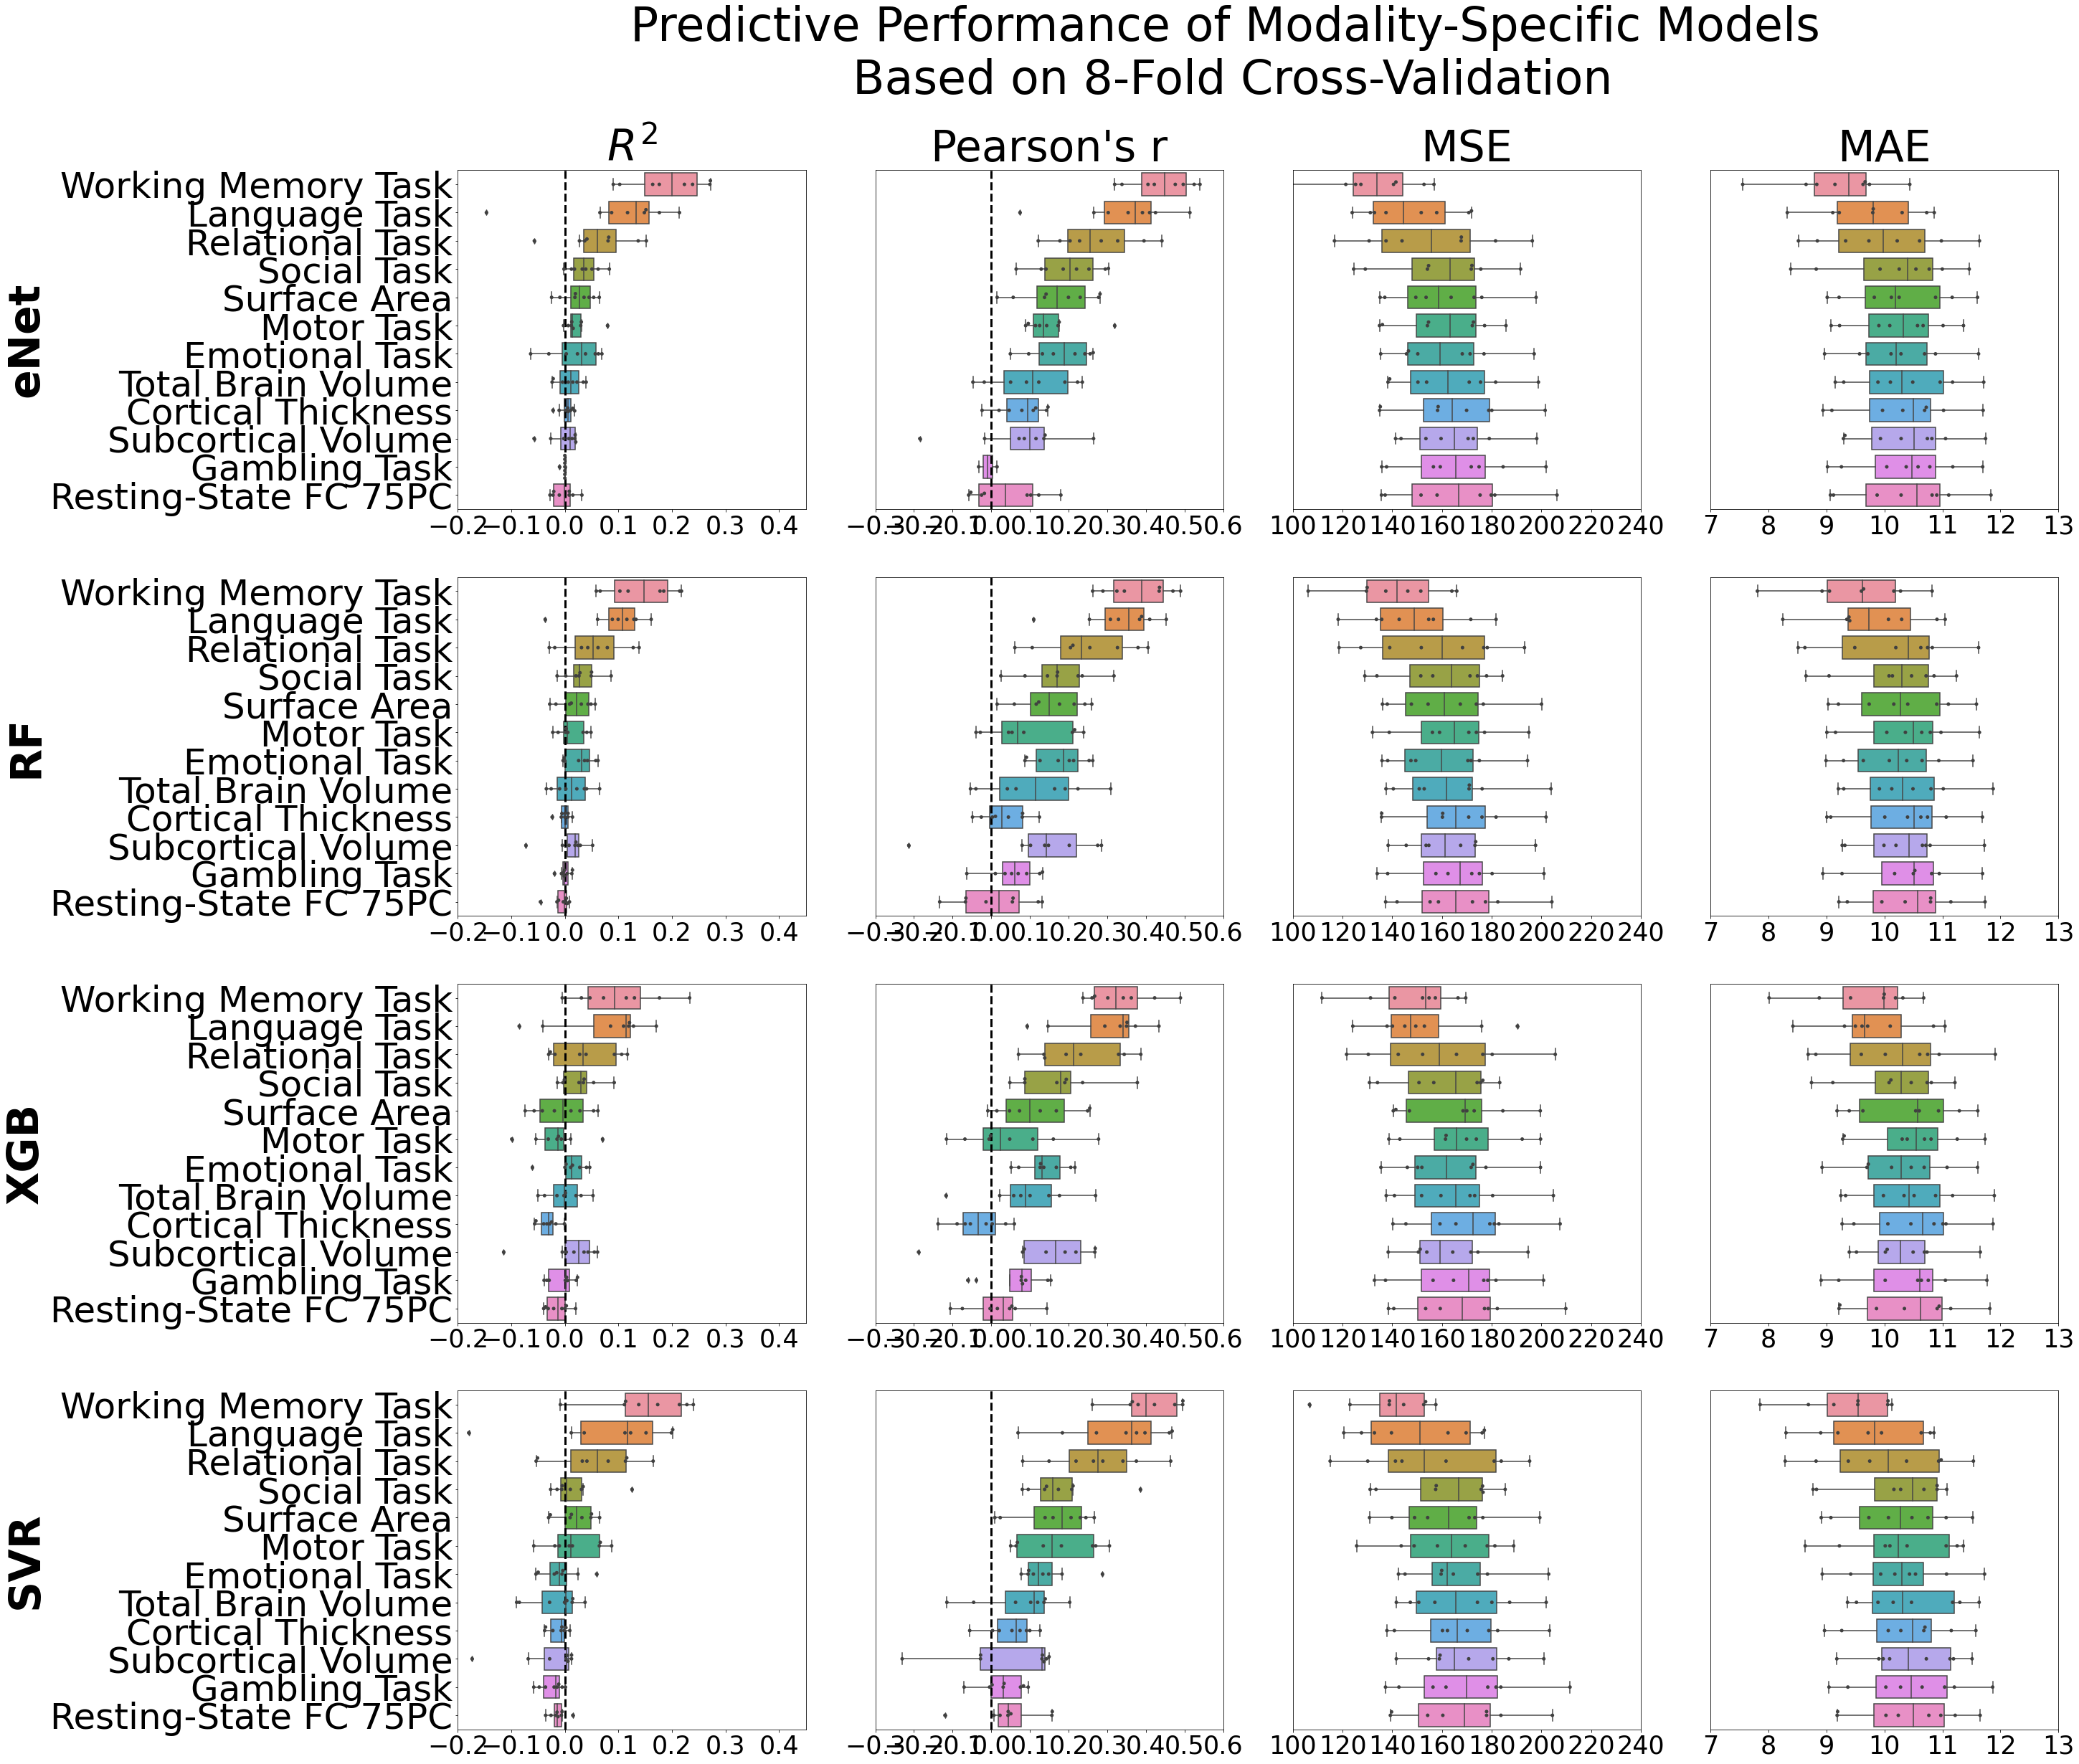

In [22]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
fig = plt.figure(figsize=(40,40))
palette = "Set1"
font1=28
font2=35
font3=50

plt.suptitle('Predictive Performance of Modality-Specific Models \nBased on 8-Fold Cross-Validation', fontsize=65, y=0.96)


df = copy.deepcopy(dct_cv['r2']['eNet'])

col_ord=df.mean().sort_values(ascending=False).index
#if INDEX in ['mae','mse']:
#    col_ord=df.mean().sort_values(ascending=True).index
#else:
#    col_ord=df.mean().sort_values(ascending=False).index


new_labels = []
for col in col_ord:
    if col in 'wm':
        new_labels += ['Working Memory Task']
    if col in 'lan':
        new_labels += ['Language Task']
    if col in 'rel':
        new_labels += ['Relational Task']
    if col in 'mot':
        new_labels += ['Motor Task']
    if col in 'emo':
        new_labels += ['Emotional Task']
    if col in 'soc':
        new_labels += ['Social Task']
    if col in 'gam':
        new_labels += ['Gambling Task']
    if col in 'rest-pca75':
        new_labels += ['Resting-State FC 75PC']
    if col in 'surf':
        new_labels += ['Surface Area']
    if col in 'VolBrain':
        new_labels += ['Total Brain Volume']
    if col in 'subc':
        new_labels += ['Subcortical Volume']
    if col in 'cort':
        new_labels += ['Cortical Thickness']



for INDEX, k in zip(INDEXes, range(4)):
    k=k+1


    for modtype, y in zip(['eNet', 'rf','xgb', 'svr'], [0,4,8,12]):
            if INDEX in ['mae']:
                lim = (7,13)
            if INDEX in ['r2']:
                lim = (-0.2, 0.45)
            if INDEX in ['cor']:
                lim = (-0.3,0.6)
            if INDEX in ['mse']:
                lim = (100,240)
             
            plt.subplot(4,4,k+y) #1

            if y==0:
                if INDEX == 'cor':
                    plt.title(str("Pearson's r"), fontsize=60) 
                elif INDEX == 'r2':
                    plt.title(str('$R^2$'), fontsize=60) 
                else:
                    plt.title(str(INDEX).upper(), fontsize=60)  
            
            
            data = dct_cv[INDEX][modtype].reindex(columns=col_ord)
            
            sns.boxplot(data = data, orient="h")
            sns.swarmplot(data = data, color=".25", orient="h", dodge=True)
                        
            
            plt.xlim(lim)
            plt.xticks(fontsize=font2)
            plt.xlabel('',fontsize=font3)

            if k+y in [1,5,9,13]:
                plt.yticks(np.arange(len(new_labels)), new_labels,fontsize=font3)
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)
                if modtype=='eNet':
                    plt.ylabel(modtype,fontsize=60, fontweight='bold')
                else:
                    plt.ylabel(modtype.upper(),fontsize=60, fontweight='bold')
            else:
                plt.ylabel('',fontsize=font3)
                plt.yticks([],fontsize=font3)
                
            if k+y in [2,6,10,14]:
                plt.axvline(0, color='black', linestyle='dashed', linewidth=3)

            
            plt.legend([],[], frameon=False)





#fig.tight_layout(pad=1)

#fig.supxlabel('$R^2$', fontsize=50)
#fig.supylabel('The First Layer Single Modality Algorithm', fontsize=65)

plt.show()